# Laboratorio 8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 

%matplotlib inline

In [2]:
digits_X, digits_y = datasets.load_digits(return_X_y=True, as_frame=True)
digits = pd.concat([digits_X, digits_y], axis=1)
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
digits_X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## Ejercicio 1

(1 pto.)

Utilizando todos los datos, ajusta un modelo de regresión logística a los datos de dígitos. No agregues intercepto y define un máximo de iteraciones de 400.

Obtén el _score_ y explica el tan buen resultado.

In [82]:
logistic = LogisticRegression(fit_intercept=False, max_iter=400)
logistic.fit(digits_X, digits_y)

print(f"El score del modelo de regresión logística es {logistic.score(digits_X, digits_y)}")

El score del modelo de regresión logística es 1.0


__Respuesta:__ El resultado se debe a que con 400 iteraciones, el modelo de regresion logistica queda bien entrenado para que sus predicciones sean perfectas. Es mas, solo 39 iteraciones son suficientes para que el modelo sea perfecto.

## Ejercicio 2

(1 pto.)

Utilizando todos los datos, ¿Cuál es la mejor elección del parámetro $k$ al ajustar un modelo kNN a los datos de dígitos? Utiliza valores $k=2, ..., 10$.

In [5]:
for k in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(digits_X, digits_y)
    print(f"El score del modelo de kNN con k={k} es {knn.score(digits_X, digits_y)}")

El score del modelo de kNN con k=2 es 0.9910962715637173
El score del modelo de kNN con k=3 es 0.993322203672788
El score del modelo de kNN con k=4 es 0.9922092376182526
El score del modelo de kNN con k=5 es 0.9905397885364496
El score del modelo de kNN con k=6 es 0.989983305509182
El score del modelo de kNN con k=7 es 0.9905397885364496
El score del modelo de kNN con k=8 es 0.9894268224819143
El score del modelo de kNN con k=9 es 0.9888703394546466


__Respuesta:__ El mejor fue k=3, ya que tuvo el score mas alto, es decir, fue el modelo mas preciso.

## Ejercicio 3

(1 pto.)

Grafica la matriz de confusión normalizada por predicción de ambos modelos (regresión logística y kNN con la mejor elección de $k$).

¿Qué conclusión puedes sacar?

Hint: Revisa el argumento `normalize` de la matriz de confusión.

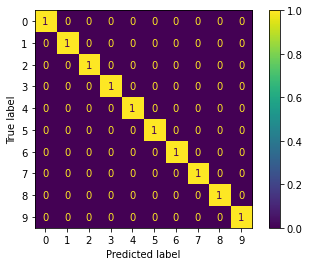

In [7]:
plot_confusion_matrix(logistic, digits_X, digits_y, normalize="pred");

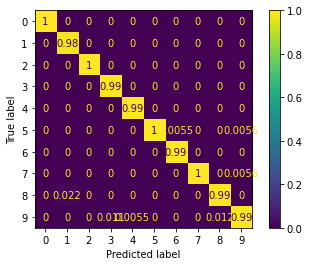

In [8]:
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(digits_X, digits_y)
plot_confusion_matrix(best_knn, digits_X, digits_y, normalize="pred");

__Respuesta:__ De la matriz de la regresion logistica se confirma el resultado obtenido en el Ejercicio 1, el modelo fue perfecto. En el caso de la matriz para el kNN, se ve que hubieron errores en la prediccion, y que las predicciones erroneas son los numeros en los que la diagonal de la matriz es distinta de 1, o sea, en el 1,3,4,6,8,9.

## Ejercicio 4

(1 pto.)

Escoge algún registro donde kNN se haya equivocado, _plotea_ la imagen y comenta las razones por las que el algoritmo se pudo haber equivocado.

In [52]:
predict = pd.Series(best_knn.predict(digits_X)) 
predict = predict.rename("predict")
df = pd.concat([predict, digits_y], axis=1) 

df.query("predict != target") #Se creó un dataframe con los valores predichos por el modelo y el numero target para ver en que numero se equivoco

,predict,target
5,9,5
69,4,9
129,1,8
480,9,7
547,8,9
794,1,8
813,3,9
1100,8,9
1361,6,5
1553,1,8


El valor real del registro seleccionado es

In [61]:
i = 480
digits_y[i]

7

Mentras que la predicción dada por kNN es

In [60]:
predict.iloc[i]

9

A continuación la imagen

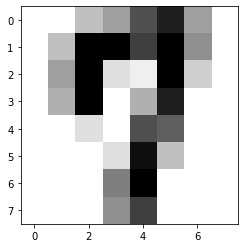

In [46]:
plt.imshow(digits_X.loc[[i], :].to_numpy().reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest');

__Respuesta:__ El palito vertical de arriba a la izquierda hace que el 7 tenga una especie de curva en su parte superior, ademas el palo de abajo esta muy centrado, lo que acentua la curva, por lo que el algoritmo penso que era un 9. 